# **Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Library**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV

# **Dataset**

## Link [Dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

## Load Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data Science Course and Bootcamp/DLB/Final Project/diabetes.csv')

## Cek Data

### Data



In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Shape

In [ ]:
data.shape

(768, 9)

### Tipe Data Setiap Atribut

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Detail Data

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Korelasi Antar Atribut

In [ ]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Nilai Null Setiap Atribut

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# **Preprocessing**

## Mendeteksi Data Outlier dengan IQR ( Inter Quartile Range )

### Atribut Pregnancies

Visualisasi IQR dengan Bloxplot

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


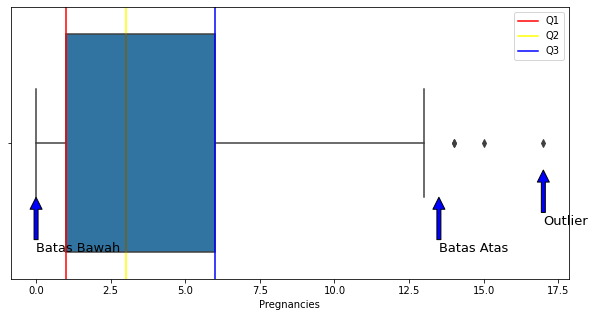

In [ ]:
plt.figure(figsize = (10, 5))
sns.boxplot(data['Pregnancies'])
plt.axvline(data['Pregnancies'].describe()['25%'], color = 'red', label = 'Q1')
plt.axvline(data['Pregnancies'].describe()['50%'], color = 'yellow', label = 'Q2')
plt.axvline(data['Pregnancies'].describe()['75%'], color = 'blue', label = 'Q3')
plt.annotate('Outlier', (data['Pregnancies'].describe()['max'],0.1), xytext = (data['Pregnancies'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )

IQR = data['Pregnancies'].describe()['75%'] - data['Pregnancies'].describe()['25%']
plt.annotate('Batas Atas', (data['Pregnancies'].describe()['75%'] + 1.5*IQR, 0.2), 
             xytext = (data['Pregnancies'].describe()['75%'] + 1.5*IQR, 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )

plt.annotate('Batas Bawah', (data['Pregnancies'].describe()['min'], 0.2), 
             xytext = (data['Pregnancies'].describe()['min'], 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )

plt.legend()

Menampilkan Data Outlier

In [ ]:
def detect_outliers(df, x):
    Q1 = df[x].describe()['25%']
    Q3 = df[x].describe()['75%']
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]

In [ ]:
detect_outliers(data,'Pregnancies')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


In [ ]:
pregnancies = detect_outliers(data,'Pregnancies')
row_pregnancies = pregnancies.index.values.tolist()
value_pregnancies = pregnancies['Pregnancies'].values.tolist()

print("Outlier atribut Pregnancies terdapat pada baris ke :",row_pregnancies)
print("Outlier atribut Pregnancies bernilai :",value_pregnancies)

Outlier atribut Pregnancies terdapat pada baris ke : [88, 159, 298, 455]
Outlier atribut Pregnancies bernilai : [15, 17, 14, 14]


Menghapus Data Outlier

In [ ]:
Q1 = data['Pregnancies'].describe()['25%']
Q3 = data['Pregnancies'].describe()['75%']
IQR = Q3-Q1

outlier_pregnancies = data[data['Pregnancies'] <= Q3+1.5*IQR]
outlier_pregnancies.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Cek Shape Data Hasil Tanpa Outlier Pregnancies

In [ ]:
outlier_pregnancies.shape

(764, 9)

### Atribut SkinThickness

Visualisasi IQR dengan Bloxplot

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


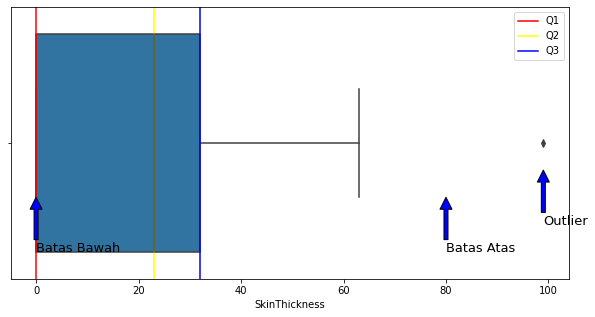

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 5))
sns.boxplot(data['SkinThickness'])
plt.axvline(data['SkinThickness'].describe()['25%'], color = 'red', label = 'Q1')
plt.axvline(data['SkinThickness'].describe()['50%'], color = 'yellow', label = 'Q2')
plt.axvline(data['SkinThickness'].describe()['75%'], color = 'blue', label = 'Q3')
plt.annotate('Outlier', (data['SkinThickness'].describe()['max'],0.1), xytext = (data['SkinThickness'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = data['SkinThickness'].describe()['75%'] - data['SkinThickness'].describe()['25%']
plt.annotate('Batas Atas', (data['SkinThickness'].describe()['75%'] + 1.5*IQR, 0.2), 
             xytext = (data['SkinThickness'].describe()['75%'] + 1.5*IQR, 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.annotate('Batas Bawah', (data['SkinThickness'].describe()['min'], 0.2), 
             xytext = (data['SkinThickness'].describe()['min'], 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.legend()

Menampilkan Data Outlier

In [ ]:
def detect_outliers(df, x):
    Q1 = df[x].describe()['25%']
    Q3 = df[x].describe()['75%']
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]

In [ ]:
detect_outliers(data,'SkinThickness')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,0,34.7,0.575,62,1


In [ ]:
SkinThickness = detect_outliers(data,'SkinThickness')
row_SkinThickness = SkinThickness.index.values.tolist()
value_SkinThickness = SkinThickness['SkinThickness'].values.tolist()

print("Outlier atribut SkinThickness terdapat pada baris ke :",row_SkinThickness)
print("Outlier atribut SkinThickness bernilai :",value_SkinThickness)

Outlier atribut SkinThickness terdapat pada baris ke : [579]
Outlier atribut SkinThickness bernilai : [99]


Menghapus Data Outlier

In [ ]:
Q1 = outlier_pregnancies['SkinThickness'].describe()['25%']
Q3 = outlier_pregnancies['SkinThickness'].describe()['75%']
IQR = Q3-Q1

outlier_SkinThickness = outlier_pregnancies[outlier_pregnancies['SkinThickness'] <= Q3+1.5*IQR]
outlier_SkinThickness.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Cek Shape Data Hasil Tanpa Outlier SkinThickness

In [ ]:
outlier_SkinThickness.shape

(763, 9)

### Atribut Insulin

Visualisasi IQR dengan Bloxplot

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


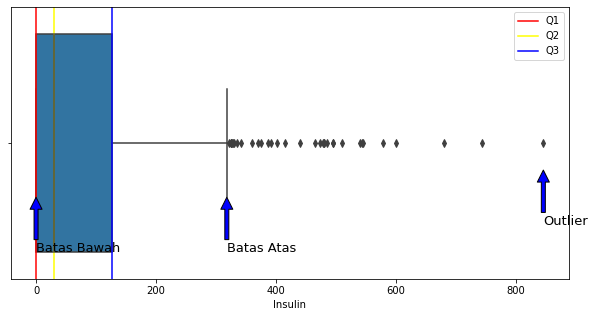

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 5))
sns.boxplot(data['Insulin'])
plt.axvline(data['Insulin'].describe()['25%'], color = 'red', label = 'Q1')
plt.axvline(data['Insulin'].describe()['50%'], color = 'yellow', label = 'Q2')
plt.axvline(data['Insulin'].describe()['75%'], color = 'blue', label = 'Q3')
plt.annotate('Outlier', (data['Insulin'].describe()['max'],0.1), xytext = (data['Insulin'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = data['Insulin'].describe()['75%'] - data['Insulin'].describe()['25%']
plt.annotate('Batas Atas', (data['Insulin'].describe()['75%'] + 1.5*IQR, 0.2), 
             xytext = (data['Insulin'].describe()['75%'] + 1.5*IQR, 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.annotate('Batas Bawah', (data['Insulin'].describe()['min'], 0.2), 
             xytext = (data['Insulin'].describe()['min'], 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.legend()

Menampilkan Data Outlier

In [ ]:
def detect_outliers(df, x):
    Q1 = df[x].describe()['25%']
    Q3 = df[x].describe()['75%']
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]

In [ ]:
detect_outliers(data,'Insulin')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
54,7,150,66,42,342,34.7,0.718,42,0
111,8,155,62,26,495,34.0,0.543,46,1
139,5,105,72,29,325,36.9,0.159,28,0
153,1,153,82,42,485,40.6,0.687,23,0
186,8,181,68,36,495,30.1,0.615,60,1
220,0,177,60,29,478,34.6,1.072,21,1
228,4,197,70,39,744,36.7,2.329,31,0
231,6,134,80,37,370,46.2,0.238,46,1


In [ ]:
Insulin = detect_outliers(data,'Insulin')
row_Insulin = Insulin.index.values.tolist()
value_Insulin = Insulin['Insulin'].values.tolist()

print("Outlier atribut Insulin terdapat pada baris ke :",row_Insulin)
print("Outlier atribut Insulin bernilai :",value_Insulin)

Outlier atribut Insulin terdapat pada baris ke : [8, 13, 54, 111, 139, 153, 186, 220, 228, 231, 247, 248, 258, 286, 296, 360, 370, 375, 392, 409, 415, 480, 486, 519, 574, 584, 612, 645, 655, 695, 707, 710, 715, 753]
Outlier atribut Insulin bernilai : [543, 846, 342, 495, 325, 485, 495, 478, 744, 370, 680, 402, 375, 545, 360, 325, 465, 325, 415, 579, 474, 328, 480, 326, 330, 600, 321, 440, 540, 480, 335, 387, 392, 510]


Menghapus Data Outlier

In [ ]:
Q1 = outlier_SkinThickness['Insulin'].describe()['25%']
Q3 = outlier_SkinThickness['Insulin'].describe()['75%']
IQR = Q3-Q1

outlier_Insulin = outlier_SkinThickness[outlier_SkinThickness['Insulin'] <= Q3+1.5*IQR]
outlier_Insulin.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Cek Shape Data Hasil Tanpa Outlier Insulin

In [ ]:
outlier_Insulin.shape

(729, 9)

### Atribut BloodPressure

Visualisasi IQR dengan Bloxplot

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


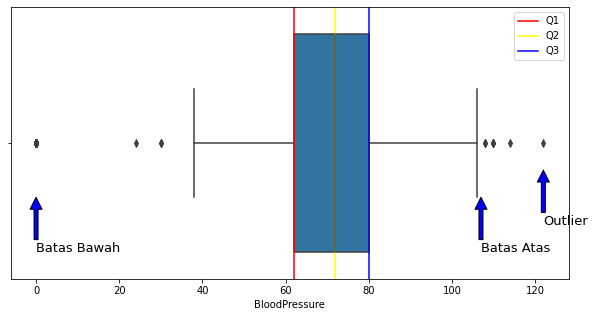

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 5))
sns.boxplot(data['BloodPressure'])
plt.axvline(data['BloodPressure'].describe()['25%'], color = 'red', label = 'Q1')
plt.axvline(data['BloodPressure'].describe()['50%'], color = 'yellow', label = 'Q2')
plt.axvline(data['BloodPressure'].describe()['75%'], color = 'blue', label = 'Q3')
plt.annotate('Outlier', (data['BloodPressure'].describe()['max'],0.1), xytext = (data['BloodPressure'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = data['BloodPressure'].describe()['75%'] - data['BloodPressure'].describe()['25%']
plt.annotate('Batas Atas', (data['BloodPressure'].describe()['75%'] + 1.5*IQR, 0.2), 
             xytext = (data['BloodPressure'].describe()['75%'] + 1.5*IQR, 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.annotate('Batas Bawah', (data['BloodPressure'].describe()['min'], 0.2), 
             xytext = (data['BloodPressure'].describe()['min'], 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.legend()

Menampilkan Data Outlier

In [ ]:
def detect_outliers(df, x):
    Q1 = df[x].describe()['25%']
    Q3 = df[x].describe()['75%']
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]

In [ ]:
detect_outliers(data,'BloodPressure')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
18,1,103,30,38,83,43.3,0.183,33,0
43,9,171,110,24,240,45.4,0.721,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
84,5,137,108,0,0,48.8,0.227,37,1
106,1,96,122,0,0,22.4,0.207,27,0


In [ ]:
BloodPressure = detect_outliers(data,'BloodPressure')
row_BloodPressure = BloodPressure.index.values.tolist()
value_BloodPressure = BloodPressure['BloodPressure'].values.tolist()

print("Outlier atribut BloodPressure terdapat pada baris ke :",row_BloodPressure)
print("Outlier atribut BloodPressure bernilai :",value_BloodPressure)

Outlier atribut BloodPressure terdapat pada baris ke : [7, 15, 18, 43, 49, 60, 78, 81, 84, 106, 125, 172, 177, 193, 222, 261, 266, 269, 300, 332, 336, 347, 357, 362, 426, 430, 435, 453, 468, 484, 494, 522, 533, 535, 549, 589, 597, 601, 604, 619, 643, 691, 697, 703, 706]
Outlier atribut BloodPressure bernilai : [0, 0, 30, 110, 0, 0, 0, 0, 108, 122, 30, 0, 110, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 108, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 0, 24, 0, 0, 0, 0, 114, 0, 0, 0]


Menghapus Data Outlier

In [ ]:
Q1 = outlier_Insulin['BloodPressure'].describe()['25%']
Q3 = outlier_Insulin['BloodPressure'].describe()['75%']
IQR = Q3-Q1

outlier_BloodPressure = outlier_Insulin[outlier_Insulin['BloodPressure'] <= Q3+1.5*IQR]
outlier_BloodPressure = outlier_BloodPressure[outlier_BloodPressure['BloodPressure'] >= Q1-1.5*IQR]
outlier_BloodPressure.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Cek Shape Data Hasil Tanpa Outlier BloodPressure

In [ ]:
outlier_BloodPressure.shape

(684, 9)

### Atribut Glucose

Visualisasi IQR dengan Bloxplot

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


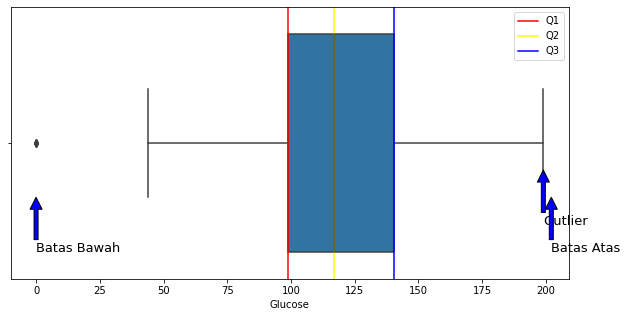

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 5))
sns.boxplot(data['Glucose'])
plt.axvline(data['Glucose'].describe()['25%'], color = 'red', label = 'Q1')
plt.axvline(data['Glucose'].describe()['50%'], color = 'yellow', label = 'Q2')
plt.axvline(data['Glucose'].describe()['75%'], color = 'blue', label = 'Q3')
plt.annotate('Outlier', (data['Glucose'].describe()['max'],0.1), xytext = (data['Glucose'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = data['Glucose'].describe()['75%'] - data['Glucose'].describe()['25%']
plt.annotate('Batas Atas', (data['Glucose'].describe()['75%'] + 1.5*IQR, 0.2), 
             xytext = (data['Glucose'].describe()['75%'] + 1.5*IQR, 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.annotate('Batas Bawah', (data['Glucose'].describe()['min'], 0.2), 
             xytext = (data['Glucose'].describe()['min'], 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.legend()

Menampilkan Data Outlier

In [ ]:
def detect_outliers(df, x):
    Q1 = df[x].describe()['25%']
    Q3 = df[x].describe()['75%']
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]

In [ ]:
detect_outliers(data,'Glucose')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [ ]:
Glucose = detect_outliers(data,'Glucose')
row_Glucose = Glucose.index.values.tolist()
value_Glucose = Glucose['Glucose'].values.tolist()

print("Outlier atribut Glucose terdapat pada baris ke :",row_Glucose)
print("Outlier atribut Glucose bernilai :",value_Glucose)

Outlier atribut Glucose terdapat pada baris ke : [75, 182, 342, 349, 502]
Outlier atribut Glucose bernilai : [0, 0, 0, 0, 0]


Menghapus Data Outlier

In [ ]:
Q1 = outlier_BloodPressure['Glucose'].describe()['25%']
Q3 = outlier_BloodPressure['Glucose'].describe()['75%']
IQR = Q3-Q1

outlier_Glucose = outlier_BloodPressure[outlier_BloodPressure['Glucose'] >= Q1-1.5*IQR]
outlier_Glucose.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Cek Shape Data Hasil Tanpa Outlier Glucose

In [ ]:
outlier_Glucose.shape

(679, 9)

### Atribut BMI

Visualisasi IQR dengan Bloxplot

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


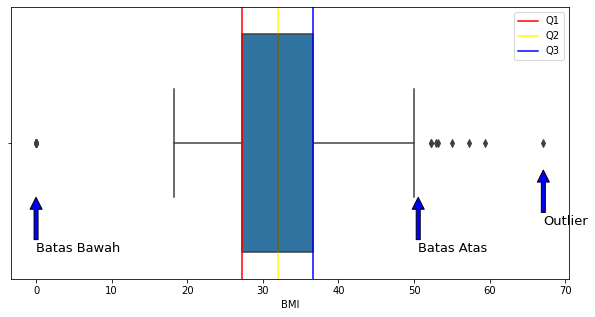

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 5))
sns.boxplot(data['BMI'])
plt.axvline(data['BMI'].describe()['25%'], color = 'red', label = 'Q1')
plt.axvline(data['BMI'].describe()['50%'], color = 'yellow', label = 'Q2')
plt.axvline(data['BMI'].describe()['75%'], color = 'blue', label = 'Q3')
plt.annotate('Outlier', (data['BMI'].describe()['max'],0.1), xytext = (data['BMI'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = data['BMI'].describe()['75%'] - data['BMI'].describe()['25%']
plt.annotate('Batas Atas', (data['BMI'].describe()['75%'] + 1.5*IQR, 0.2), 
             xytext = (data['BMI'].describe()['75%'] + 1.5*IQR, 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.annotate('Batas Bawah', (data['BMI'].describe()['min'], 0.2), 
             xytext = (data['BMI'].describe()['min'], 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.legend()

Menampilkan Data Outlier

In [ ]:
def detect_outliers(df, x):
    Q1 = df[x].describe()['25%']
    Q3 = df[x].describe()['75%']
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]

In [ ]:
detect_outliers(data,'BMI')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
120,0,162,76,56,100,53.2,0.759,25,1
125,1,88,30,42,99,55.0,0.496,26,1
145,0,102,75,23,0,0.0,0.572,21,0
177,0,129,110,46,130,67.1,0.319,26,1
193,11,135,0,0,0,52.3,0.578,40,1
247,0,165,90,33,680,52.3,0.427,23,0


In [ ]:
BMI = detect_outliers(data,'BMI')
row_BMI = BMI.index.values.tolist()
value_BMI = BMI['BMI'].values.tolist()

print("Outlier atribut BMI terdapat pada baris ke :",row_BMI)
print("Outlier atribut BMI bernilai :",value_BMI)

Outlier atribut BMI terdapat pada baris ke : [9, 49, 60, 81, 120, 125, 145, 177, 193, 247, 303, 371, 426, 445, 494, 522, 673, 684, 706]
Outlier atribut BMI bernilai : [0.0, 0.0, 0.0, 0.0, 53.2, 55.0, 0.0, 67.1, 52.3, 52.3, 52.9, 0.0, 0.0, 59.4, 0.0, 0.0, 57.3, 0.0, 0.0]


Menghapus Data Outlier

In [ ]:
Q1 = outlier_Glucose['BMI'].describe()['25%']
Q3 = outlier_Glucose['BMI'].describe()['75%']
IQR = Q3-Q1

outlier_BMI = outlier_Glucose[outlier_Glucose['BMI'] <= Q3+1.5*IQR]
outlier_BMI = outlier_BMI[outlier_BMI['BMI'] >= Q1-1.5*IQR]

outlier_BMI.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Cek Shape Data Hasil Tanpa Outlier BMI

In [ ]:
outlier_BMI.shape

(668, 9)

### Atribut DiabetesPedigreeFunction

Visualisasi IQR dengan Bloxplot

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


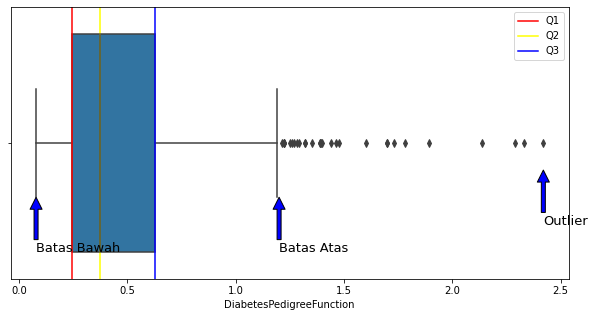

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 5))
sns.boxplot(data['DiabetesPedigreeFunction'])
plt.axvline(data['DiabetesPedigreeFunction'].describe()['25%'], color = 'red', label = 'Q1')
plt.axvline(data['DiabetesPedigreeFunction'].describe()['50%'], color = 'yellow', label = 'Q2')
plt.axvline(data['DiabetesPedigreeFunction'].describe()['75%'], color = 'blue', label = 'Q3')
plt.annotate('Outlier', (data['DiabetesPedigreeFunction'].describe()['max'],0.1), xytext = (data['DiabetesPedigreeFunction'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = data['DiabetesPedigreeFunction'].describe()['75%'] - data['DiabetesPedigreeFunction'].describe()['25%']
plt.annotate('Batas Atas', (data['DiabetesPedigreeFunction'].describe()['75%'] + 1.5*IQR, 0.2), 
             xytext = (data['DiabetesPedigreeFunction'].describe()['75%'] + 1.5*IQR, 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.annotate('Batas Bawah', (data['DiabetesPedigreeFunction'].describe()['min'], 0.2), 
             xytext = (data['DiabetesPedigreeFunction'].describe()['min'], 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.legend()

Menampilkan Data Outlier

In [ ]:
def detect_outliers(df, x):
    Q1 = df[x].describe()['25%']
    Q3 = df[x].describe()['75%']
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]

In [ ]:
detect_outliers(data,'DiabetesPedigreeFunction')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
12,10,139,80,0,0,27.1,1.441,57,0
39,4,111,72,47,207,37.1,1.390,56,1
45,0,180,66,39,0,42.0,1.893,25,1
58,0,146,82,0,0,40.5,1.781,44,0
100,1,163,72,0,0,39.0,1.222,33,1
147,2,106,64,35,119,30.5,1.400,34,0
187,1,128,98,41,58,32.0,1.321,33,1
218,5,85,74,22,0,29.0,1.224,32,1
228,4,197,70,39,744,36.7,2.329,31,0


In [ ]:
DiabetesPedigreeFunction = detect_outliers(data,'DiabetesPedigreeFunction')
row_DiabetesPedigreeFunction = DiabetesPedigreeFunction.index.values.tolist()
value_DiabetesPedigreeFunction = DiabetesPedigreeFunction['DiabetesPedigreeFunction'].values.tolist()

print("Outlier atribut DiabetesPedigreeFunction terdapat pada baris ke :",row_DiabetesPedigreeFunction)
print("Outlier atribut DiabetesPedigreeFunction bernilai :",value_DiabetesPedigreeFunction)

Outlier atribut DiabetesPedigreeFunction terdapat pada baris ke : [4, 12, 39, 45, 58, 100, 147, 187, 218, 228, 243, 245, 259, 292, 308, 330, 370, 371, 383, 395, 445, 534, 593, 606, 618, 621, 622, 659, 661]
Outlier atribut DiabetesPedigreeFunction bernilai : [2.2880000000000003, 1.4409999999999998, 1.39, 1.893, 1.781, 1.222, 1.4, 1.321, 1.224, 2.329, 1.318, 1.213, 1.3530000000000002, 1.224, 1.391, 1.476, 2.137, 1.7309999999999999, 1.268, 1.6, 2.42, 1.251, 1.699, 1.258, 1.2819999999999998, 1.6980000000000002, 1.4609999999999999, 1.2919999999999998, 1.3940000000000001]


Menghapus Data Outlier

In [ ]:
Q1 = outlier_BMI['DiabetesPedigreeFunction'].describe()['25%']
Q3 = outlier_BMI['DiabetesPedigreeFunction'].describe()['75%']
IQR = Q3-Q1

outlier_DiabetesPedigreeFunction = outlier_BMI[outlier_BMI['DiabetesPedigreeFunction'] <= Q3+1.5*IQR]

outlier_DiabetesPedigreeFunction.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


Cek Shape Data Hasil Tanpa Outlier DiabetesPedigreeFunction

In [ ]:
outlier_DiabetesPedigreeFunction.shape

(639, 9)

### Atribut Age

Visualisasi IQR dengan Bloxplot

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


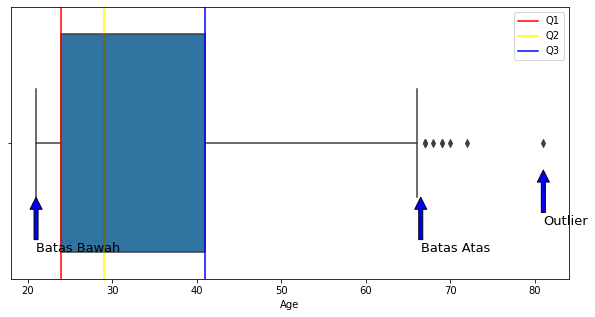

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 5))
sns.boxplot(data['Age'])
plt.axvline(data['Age'].describe()['25%'], color = 'red', label = 'Q1')
plt.axvline(data['Age'].describe()['50%'], color = 'yellow', label = 'Q2')
plt.axvline(data['Age'].describe()['75%'], color = 'blue', label = 'Q3')
plt.annotate('Outlier', (data['Age'].describe()['max'],0.1), xytext = (data['Age'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = data['Age'].describe()['75%'] - data['Age'].describe()['25%']
plt.annotate('Batas Atas', (data['Age'].describe()['75%'] + 1.5*IQR, 0.2), 
             xytext = (data['Age'].describe()['75%'] + 1.5*IQR, 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.annotate('Batas Bawah', (data['Age'].describe()['min'], 0.2), 
             xytext = (data['Age'].describe()['min'], 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.legend()

Menampilkan Data Outlier

In [ ]:
def detect_outliers(df, x):
    Q1 = df[x].describe()['25%']
    Q3 = df[x].describe()['75%']
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]

In [ ]:
detect_outliers(data,'Age')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5,132,80,0,0,26.8,0.186,69,0
363,4,146,78,0,0,38.5,0.520,67,1
453,2,119,0,0,0,19.6,0.832,72,0
459,9,134,74,33,60,25.9,0.460,81,0
489,8,194,80,0,0,26.1,0.551,67,0
537,0,57,60,0,0,21.7,0.735,67,0
666,4,145,82,18,0,32.5,0.235,70,1
674,8,91,82,0,0,35.6,0.587,68,0
684,5,136,82,0,0,0.0,0.640,69,0


In [ ]:
Age = detect_outliers(data,'Age')
row_Age = Age.index.values.tolist()
value_Age = Age['Age'].values.tolist()

print("Outlier atribut Age terdapat pada baris ke :",row_Age)
print("Outlier atribut Age bernilai :",value_Age)

Outlier atribut Age terdapat pada baris ke : [123, 363, 453, 459, 489, 537, 666, 674, 684]
Outlier atribut Age bernilai : [69, 67, 72, 81, 67, 67, 70, 68, 69]


Menghapus Data Outlier

In [ ]:
Q1 = outlier_DiabetesPedigreeFunction['Age'].describe()['25%']
Q3 = outlier_DiabetesPedigreeFunction['Age'].describe()['75%']
IQR = Q3-Q1

outlier_Age = outlier_DiabetesPedigreeFunction[outlier_DiabetesPedigreeFunction['Age'] <= Q3+1.5*IQR]

outlier_Age.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


Cek Shape Data Hasil Tanpa Outlier DiabetesPedigreeFunction

In [ ]:
outlier_Age.shape

(628, 9)

### Hasil Penghapusan Outlier

In [ ]:
data_outlier = outlier_Age

data_outlier.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
data_outlier.shape

(628, 9)

## Mengganti Nilai 0 dengan Nilai Rata-rata

### Mengganti Nilai 0 dengan NaN

In [ ]:
data_outlier[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_outlier[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

print(data_outlier.isnull().sum())

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               173
Insulin                     299
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


### Mengisi Nilai NaN dengan Nilai Rata-rata

In [ ]:
data_outlier['Glucose'].fillna(data_outlier['Glucose'].mean(), inplace = True)
data_outlier['BloodPressure'].fillna(data_outlier['BloodPressure'].mean(), inplace = True)
data_outlier['SkinThickness'].fillna(data_outlier['SkinThickness'].mean(), inplace = True)
data_outlier['Insulin'].fillna(data_outlier['Insulin'].mean(), inplace = True)
data_outlier['BMI'].fillna(data_outlier['BMI'].mean(), inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
data_outlier.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Standarisasi

In [ ]:
scaler = StandardScaler()

scaler.fit(X = data_outlier.drop('Outcome', axis = 1))
X = scaler.transform(X = data_outlier.drop('Outcome', axis = 1))

data_scaler = pd.DataFrame(X, columns=data_outlier.columns[:-1])
data_scaler.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.686942,1.024043,0.006625,7.817167e-01,0.000000,0.263982,0.825287,1.617837
1,-0.854872,-1.161598,-0.524526,6.582049e-02,0.000000,-0.839225,-0.301871,-0.138033
2,1.303667,2.238288,-0.701577,-8.477914e-16,0.000000,-1.359309,1.009063,-0.045618
3,-0.854872,-1.022827,-0.524526,-6.500757e-01,-0.673551,-0.602824,-1.053310,-1.062175
4,0.378579,-0.086124,0.183676,-8.477914e-16,0.000000,-0.996826,-0.914457,-0.230447


## Split Data untuk Train dan Test

In [ ]:
y = data_outlier['Outcome']

X_train, X_test, y_train, y_test = train_test_split(data_scaler, y, test_size = 0.1, random_state = 101)

## Recursive Feature Elimination Cross-Validation ( RFECV )

### Menghitung Jumlah Fitur yang Optimal

In [ ]:
rfc = RandomForestClassifier()
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(data_scaler, y)

print('Jumlah fitur yang Optimal : {}'.format(rfecv.n_features_))

Jumlah fitur yang Optimal : 4


### Plot List Fitur yang Optimal

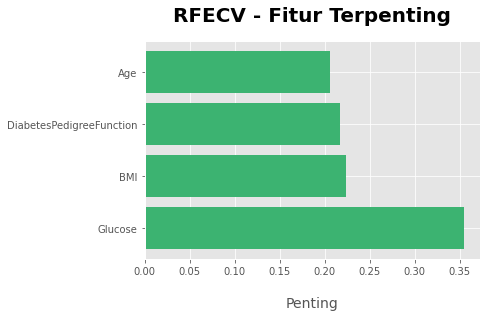

In [ ]:
# List fitur yang maksimal
rfecv.estimator_.feature_importances_

data_scaler.drop(data_scaler.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

dset = pd.DataFrame()
dset['attr'] = data_scaler.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)

plt.barh(y=dset['attr'], width=dset['importance'], color='mediumseagreen')
plt.title('RFECV - Fitur Terpenting', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Penting', fontsize=14, labelpad=20)
plt.show()

## Menyiapkan Data Hasil RFECV 

In [ ]:
data_clean = data_scaler

data_clean.head()

,Glucose,BMI,DiabetesPedigreeFunction,Age
0,1.024043,0.263982,0.825287,1.617837
1,-1.161598,-0.839225,-0.301871,-0.138033
2,2.238288,-1.359309,1.009063,-0.045618
3,-1.022827,-0.602824,-1.053310,-1.062175
4,-0.086124,-0.996826,-0.914457,-0.230447


In [ ]:
target = y

target.head()

0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64

## Split Data Hasil RFECV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_clean, target, test_size = 0.1, random_state = 101)

# **KNN**

## Prediksi Model KNN

In [ ]:
fix_KNN = KNeighborsClassifier(n_neighbors = 1)

fix_KNN.fit(X_train, y_train)

y_predict = fix_KNN.predict(X_test)

### Evaluasi Model KNN

Akurasi

In [ ]:
accuracy= accuracy_score(y_test, y_predict)
print("Akurasi : ",accuracy)

Akurasi :  0.746031746031746


Confusion Matrix

In [ ]:
print(confusion_matrix(y_test,y_predict))

[[36  7]
 [ 9 11]]


Classification Report

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        43
           1       0.61      0.55      0.58        20

    accuracy                           0.75        63
   macro avg       0.71      0.69      0.70        63
weighted avg       0.74      0.75      0.74        63



## Memilih Nilai K

Text(0.5, 1.0, 'Error Rate vs K-value')

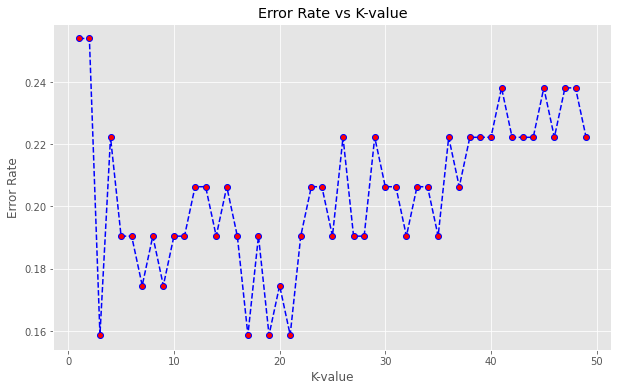

In [ ]:
err_rates = []
for idx in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = idx)
    knn.fit(X_train, y_train)
    pred_idx = knn.predict(X_test)
    err_rates.append(np.mean(y_test != pred_idx))

plt.style.use('ggplot')
plt.subplots(figsize = (10,6))
plt.plot(range(1,50), err_rates, linestyle = 'dashed', color = 'blue', marker = 'o', markerfacecolor = 'red')
plt.xlabel('K-value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K-value')

## Prediksi Model KNN dengan Nilai K Baru

In [ ]:
new_KNN = KNeighborsClassifier(n_neighbors = 21)

new_KNN.fit(X_train, y_train)

y_predict = new_KNN.predict(X_test)

### Evaluasi Model KNN

Akurasi

In [ ]:
accuracy= accuracy_score(y_test, y_predict)
print("Akurasi : ",accuracy)

Akurasi :  0.8412698412698413


Confusion Matrix

In [ ]:
print(confusion_matrix(y_test,y_predict))

[[40  3]
 [ 7 13]]


Classification Report

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        43
           1       0.81      0.65      0.72        20

    accuracy                           0.84        63
   macro avg       0.83      0.79      0.81        63
weighted avg       0.84      0.84      0.84        63

